In [ ]:
# This code is retrieved from Michel's notebook
# READ: https://hatchjs.com/graph-from-place-osmnx/

In [41]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox # for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
from shapely.geometry import Polygon
import numpy as np
import pandana as pdna
import os
from tqdm import tqdm

In [42]:
# RUN ONLY ONCE TO SAVE THE GRAPHS - ALREADY DONE

# walking_graphs = {}

# # specify parameters for the analysis
# walk_time = 15  # max walking horizon in minutes
# walk_speed = 5  # km per hour
# walk_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx

# # Loop through the neighborhoods
# for neighborhood in tqdm(neighbourhoods):
#     # Create a graph for the current neighborhood
#     G_walk_neighborhood = ox.graph_from_place(neighborhood, network_type='walk') # type of transportation is set here

#     for u, v, data in G_walk_neighborhood.edges(data=True):
#         data['speed_kph'] = walk_speed
#     G_walk_neighborhood = ox.add_edge_travel_times(G_walk_neighborhood) # this computes the travel time in seconds based on the 'speed_kph' column

# # caro path
#     # ox.save_graphml(G_walk_neighborhood, f"/Users/caro/Desktop/SPRING24/GDS/PROJECT/graphs/G_walk_{neighborhood}.graphml") # save graph per neighbourhood
# # michel path
#     ox.save_graphml(G_walk_neighborhood, f"../graphs/G_walk_{neighborhood}.graphml") # save graph per neighbourhood
#     # Store the graph in the dictionary using the neighborhood name as the key
#     walking_graphs[neighborhood] = G_walk_neighborhood

In [43]:
walking_graphs = {}
graphs_dir = '/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/graphs'
#graphs_dir = '../graphs'

if walking_graphs == {}:
    for file_name in tqdm(os.listdir(graphs_dir)):
        if file_name.endswith(".graphml"):
            neighborhood = file_name.replace("G_walk_", "").replace(".graphml", "")
            file_path = os.path.join(graphs_dir, file_name)
            G_walk_neighborhood = ox.load_graphml(file_path)
            walking_graphs[neighborhood] = G_walk_neighborhood

100%|██████████| 18/18 [01:21<00:00,  4.54s/it]


In [ ]:
biking_graphs = {}
graphs_dir = '/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/graphs'
#graphs_dir = '../graphs'

if biking_graphs == {}:
    for file_name in tqdm(os.listdir(graphs_dir)):
        if file_name.endswith(".graphml"):
            neighborhood = file_name.replace("G_bike_", "").replace(".graphml", "")
            file_path = os.path.join(graphs_dir, file_name)
            G_bike_neighborhood = ox.load_graphml(file_path)
            biking_graphs[neighborhood] = G_bike_neighborhood

In [ ]:
driving_graphs = {}
graphs_dir = '/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/graphs'
#graphs_dir = '../graphs'

if driving_graphs == {}:
    for file_name in tqdm(os.listdir(graphs_dir)):
        if file_name.endswith(".graphml"):
            neighborhood = file_name.replace("G_drive_", "").replace(".graphml", "")
            file_path = os.path.join(graphs_dir, file_name)
            G_drive_neighborhood = ox.load_graphml(file_path)
            driving_graphs[neighborhood] = G_drive_neighborhood

In [ ]:
walking_graphs = {}
graphs_dir = '/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/graphs'
#graphs_dir = '../graphs'

if walking_graphs == {}:
    for file_name in tqdm(os.listdir(graphs_dir)):
        if file_name.endswith(".graphml"):
            neighborhood = file_name.replace("G_walk_", "").replace(".graphml", "")
            file_path = os.path.join(graphs_dir, file_name)
            G_walk_neighborhood = ox.load_graphml(file_path)
            walking_graphs[neighborhood] = G_walk_neighborhood

In [44]:
pandanas = {}

if pandanas == {}:
    # Build Pandana network for each neighborhood
    for neighborhood, graph in tqdm(walking_graphs.items()):
        graph = ox.project_graph(graph, to_crs='EPSG:25832')
        nodes = ox.graph_to_gdfs(graph, edges=False)[['x', 'y']]
        edges = ox.graph_to_gdfs(graph, nodes=False).reset_index()[['u', 'v', 'travel_time']]

        network = pdna.Network(node_x=nodes['x'],
                                node_y=nodes['y'], 
                                edge_from=edges['u'],
                                edge_to=edges['v'],
                                edge_weights=edges[['travel_time']])
        
        pandanas[neighborhood] = network

  6%|▌         | 1/18 [00:06<01:47,  6.35s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 9639
Setting CH edge vector of size 30838
Range graph removed 31100 edges of 61676
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 11%|█         | 2/18 [00:15<02:08,  8.00s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 14281
Setting CH edge vector of size 46136
Range graph removed 46506 edges of 92272
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 17%|█▋        | 3/18 [00:29<02:42, 10.86s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 14970
Setting CH edge vector of size 48624
Range graph removed 48876 edges of 97248
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 22%|██▏       | 4/18 [00:31<01:39,  7.12s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 2588
Setting CH edge vector of size 8290
Range graph removed 8386 edges of 16580
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 28%|██▊       | 5/18 [00:43<01:57,  9.06s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 9720
Setting CH edge vector of size 31244
Range graph removed 31622 edges of 62488
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 33%|███▎      | 6/18 [00:53<01:50,  9.24s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 12319
Setting CH edge vector of size 38440
Range graph removed 38976 edges of 76880
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 39%|███▉      | 7/18 [00:55<01:17,  7.03s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3382
Setting CH edge vector of size 10774
Range graph removed 10912 edges of 21548
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 44%|████▍     | 8/18 [00:57<00:52,  5.28s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3200
Setting CH edge vector of size 9782
Range graph removed 9918 edges of 19564
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 50%|█████     | 9/18 [00:59<00:38,  4.26s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3603
Setting CH edge vector of size 11218
Range graph removed 11360 edges of 22436
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 56%|█████▌    | 10/18 [01:01<00:28,  3.56s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3795
Setting CH edge vector of size 11622
Range graph removed 11734 edges of 23244
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 61%|██████    | 11/18 [01:11<00:40,  5.74s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 10411
Setting CH edge vector of size 33610
Range graph removed 33746 edges of 67220
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 67%|██████▋   | 12/18 [01:22<00:42,  7.10s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 8890
Setting CH edge vector of size 29956
Range graph removed 30224 edges of 59912
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 72%|███████▏  | 13/18 [01:23<00:26,  5.29s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 1552
Setting CH edge vector of size 4430
Range graph removed 4700 edges of 8860
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 78%|███████▊  | 14/18 [01:34<00:28,  7.21s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 13822
Setting CH edge vector of size 43760
Range graph removed 44322 edges of 87520
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 83%|████████▎ | 15/18 [01:36<00:16,  5.57s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3761
Setting CH edge vector of size 11500
Range graph removed 11874 edges of 23000
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 89%|████████▉ | 16/18 [01:51<00:16,  8.33s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 16731
Setting CH edge vector of size 55202
Range graph removed 55584 edges of 110404
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 94%|█████████▍| 17/18 [01:52<00:06,  6.08s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 1441
Setting CH edge vector of size 4694
Range graph removed 4774 edges of 9388
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

100%|██████████| 18/18 [01:57<00:00,  6.52s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 6417
Setting CH edge vector of size 20386
Range graph removed 20608 edges of 40772
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [46]:
place = 'Montreal, Canada'
list_of_amenities = ['restaurant', 'cafe', 'pharmacy', 'hospital', 'parking']
tags = {'amenity': list_of_amenities}

walk_time = 15  # max walking horizon in minutes
walk_speed = 5  # km per hour
walk_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx


In [47]:
amenities = ox.features_from_place(place, tags=tags)
amenities = amenities.to_crs('EPSG:25832')

# Dictionary to store centroids for each amenity
centroids_per_amenity = {}

# Loop through each amenity category
for amenity in list_of_amenities:
    # Filter amenities for the current category
    amenities_category = amenities[amenities['amenity'] == amenity]
    # Calculate centroids for the current category
    centroids_category = amenities_category.centroid
    # Store centroids for the current category in the dictionary
    centroids_per_amenity[amenity] = centroids_category

graphs_dir = '/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/graphs'
#graphs_dir = '../graphs'

walk_graphs = {}
for file_name in tqdm(os.listdir(graphs_dir)):
    if file_name.endswith(".graphml"):
        neighborhood = file_name.replace("G_walk_", "").replace(".graphml", "")
        file_path = os.path.join(graphs_dir, file_name)
        G_walk_neighborhood = ox.load_graphml(file_path)
        walking_graphs[neighborhood] = G_walk_neighborhood
            

walk_pandanas = {}
# Build Pandana network for each neighborhood
for neighborhood, graph in tqdm(walking_graphs.items()):
    graph = ox.project_graph(graph, to_crs='EPSG:25832')
    nodes = ox.graph_to_gdfs(graph, edges=False)[['x', 'y']]
    edges = ox.graph_to_gdfs(graph, nodes=False).reset_index()[['u', 'v', 'travel_time']]
    
    network = pdna.Network(node_x=nodes['x'],
                            node_y=nodes['y'], 
                            edge_from=edges['u'],
                            edge_to=edges['v'],
                            edge_weights=edges[['travel_time']])
    
    pandanas[neighborhood] = network


walking_distances = {}  # Initialize an empty dictionary to store distances for each amenity

for amenity in list_of_amenities:
    walking_distances[amenity] = {}

    for neighborhood, pandana in tqdm(pandanas.items()):
        # Set points of interest (POIs) for the current amenity in the current neighborhood
        pandana.set_pois(category=amenity,  # Set the current amenity category dynamically
                         maxdist=walk_time_sec,
                         maxitems=3,
                         x_col=centroids_per_amenity[amenity].x,  # Use the centroid of the current amenity
                         y_col=centroids_per_amenity[amenity].y)
        
        # Find the nearest POIs for the current amenity in the current neighborhood
        distances = pandana.nearest_pois(distance=walk_time_sec,
                                          category=amenity,  # Set the current amenity category dynamically
                                          num_pois=3)
        
        # Convert travel time from seconds to minutes
        distances['travel_time'] = distances[1] / 60
        
        # Store the distances for the current amenity in the current neighborhood
        walking_distances[amenity][neighborhood] = distances


  6%|▌         | 1/18 [00:07<02:04,  7.32s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 9639
Setting CH edge vector of size 30838
Range graph removed 31100 edges of 61676
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 11%|█         | 2/18 [00:18<02:36,  9.76s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 14281
Setting CH edge vector of size 46136
Range graph removed 46506 edges of 92272
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 17%|█▋        | 3/18 [00:32<02:52, 11.51s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 14970
Setting CH edge vector of size 48624
Range graph removed 48876 edges of 97248
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 22%|██▏       | 4/18 [00:33<01:46,  7.58s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 2588
Setting CH edge vector of size 8290
Range graph removed 8386 edges of 16580
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 28%|██▊       | 5/18 [00:40<01:33,  7.19s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 9720
Setting CH edge vector of size 31244
Range graph removed 31622 edges of 62488
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 33%|███▎      | 6/18 [00:48<01:29,  7.46s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 12319
Setting CH edge vector of size 38440
Range graph removed 38976 edges of 76880
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 39%|███▉      | 7/18 [00:50<01:03,  5.78s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3382
Setting CH edge vector of size 10774
Range graph removed 10912 edges of 21548
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 44%|████▍     | 8/18 [00:52<00:44,  4.50s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3200
Setting CH edge vector of size 9782
Range graph removed 9918 edges of 19564
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 50%|█████     | 9/18 [00:54<00:33,  3.67s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3603
Setting CH edge vector of size 11218
Range graph removed 11360 edges of 22436
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 56%|█████▌    | 10/18 [00:56<00:25,  3.21s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3795
Setting CH edge vector of size 11622
Range graph removed 11734 edges of 23244
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 61%|██████    | 11/18 [01:03<00:29,  4.26s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 10411
Setting CH edge vector of size 33610
Range graph removed 33746 edges of 67220
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 67%|██████▋   | 12/18 [01:13<00:36,  6.01s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 8890
Setting CH edge vector of size 29956
Range graph removed 30224 edges of 59912
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 72%|███████▏  | 13/18 [01:13<00:22,  4.40s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 1552
Setting CH edge vector of size 4430
Range graph removed 4700 edges of 8860
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 78%|███████▊  | 14/18 [01:21<00:21,  5.26s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 13822
Setting CH edge vector of size 43760
Range graph removed 44322 edges of 87520
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 83%|████████▎ | 15/18 [01:24<00:13,  4.58s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3761
Setting CH edge vector of size 11500
Range graph removed 11874 edges of 23000
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 89%|████████▉ | 16/18 [01:33<00:11,  5.98s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 16731
Setting CH edge vector of size 55202
Range graph removed 55584 edges of 110404
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 94%|█████████▍| 17/18 [01:34<00:04,  4.41s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 1441
Setting CH edge vector of size 4694
Range graph removed 4774 edges of 9388
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

100%|██████████| 18/18 [01:39<00:00,  5.53s/it]


Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 6417
Setting CH edge vector of size 20386
Range graph removed 20608 edges of 40772
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


  0%|          | 0/18 [00:00<?, ?it/s]/Users/caro/Library/Python/3.10/lib/python/site-packages/pandana/network.py:753: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
/Users/caro/Library/Python/3.10/lib/python/site-packages/pandana/network.py:761: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):
  6%|▌         | 1/18 [00:00<00:04,  3.98it/s]/Users/caro/Library/Python/3.10/lib/python/site-packages/pandana/network.py:753: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
/Users/caro/Library/Python/3.10/lib/python/site

In [48]:
# function for plotting
def plot_neighborhood_graph(transportation_type, neighbourhood, distances_by_transportation, amenity):
    
    # Load the appropriate graph based on the transportation type
    if transportation_type == "walking":
        G = walking_graphs[f"{neighbourhood}, Montreal, Canada"]
    elif transportation_type == "driving":
        G = driving_graphs[f"{neighbourhood}, Montreal, Canada"]
    elif transportation_type == "biking":
        G = biking_graphs[f"{neighbourhood}, Montreal, Canada"]
    # CRS
    G_proj = ox.project_graph(G)
    
    distances = distances_by_transportation[amenity][f"{neighbourhood}, Montreal, Canada"]
    
    # Plot the graph with a light background
    fig, ax = ox.plot_graph(G_proj, figsize=(10, 8), bgcolor='white', edge_color='#CCCCCC', edge_linewidth=0.5, node_size=0, show=False, close=False)
    
    # Assuming 'nodes_anjou' is a DataFrame containing node positions and 'distances_anjou' contains the data to plot
    nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
    
    # Scatter plot on the same Axes instance
    sc = ax.scatter(x=nodes_proj["x"], y=nodes_proj["y"], c=distances['travel_time'], s=30, cmap='inferno_r', alpha=0.8)
    
    # Add colorbar
    plt.colorbar(sc, ax=ax, shrink=0.7)
    
    # Show the plot
    plt.show()


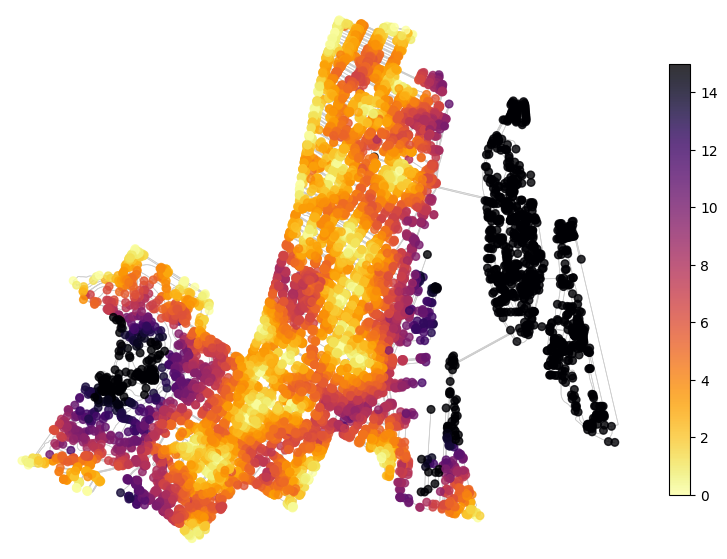

In [49]:
# example usage
plot_neighborhood_graph(transportation_type='walking',
                        neighbourhood='Ville-Marie',
                        distances_by_transportation=walking_distances,
                        amenity='pharmacy')

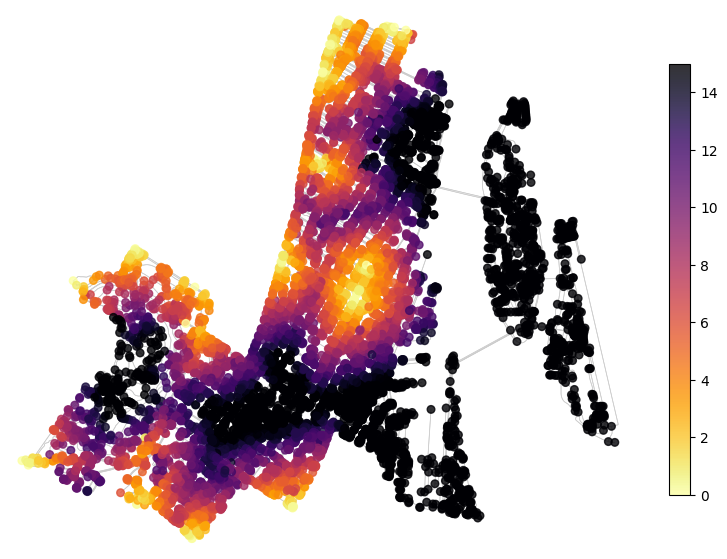

In [50]:
plot_neighborhood_graph(transportation_type='walking',
                        neighbourhood='Ville-Marie', 
                        distances_by_transportation=walking_distances, 
                        amenity='hospital')

In [24]:
walking_distances['Anjou, Montreal, Canada']['travel_time'].mean() # restaurants

6.589771848365432

In [36]:
walking_distances['Ville-Marie, Montreal, Canada']['travel_time'].mean() # restaurants

2.2069084312059934

In [62]:
walking_distances['Anjou, Montreal, Canada']['travel_time'].mean() # cafes

7.245119159491112

In [63]:
walking_distances['Ville-Marie, Montreal, Canada']['travel_time'].mean() # cafes

3.314090150087297